In [16]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



Mounted at /content/drive


In [35]:
# Load the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amazon Sales data.csv")

In [36]:
#first five rows of the dataset using head() function
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Data Cleaning

In [37]:
#check missing values

missing_values = df.isnull().sum()
print(missing_values)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


There is no missing values or null values in the data. Our Data is Already Cleaned.


In [38]:
#Convert order Date to Datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [39]:
#Extract Year and Month from order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


Data Analysis


In [40]:
#Calculate the Number of regions
num_regions = df['Region'].nunique()
print("Number of regions:", num_regions)

Number of regions: 7


There are 7 different Regions in our Dataset.


In [41]:
#Calculate the Number of Countries
num_countries = df['Country'].nunique()
print("Number of countries:", num_countries)

Number of countries: 76


There are 76 different Countries in our Dataset.


In [42]:
#Calculate the Item Types
num_item_types = df['Item Type'].nunique()
print("Number of item types:", num_item_types)

Number of item types: 12


There are 12 different item Types in our Dataset.

In [43]:
#Calculate the Total Unit Solid.
total_units_sold = df['Units Sold'].sum()
print("Total units sold:", total_units_sold)

Total units sold: 512871


In [44]:
#Calculate the total unit Cost
total_unit_cost = df['Unit Cost'].sum()
print("Total unit cost:", total_unit_cost)

Total unit cost: 19104.8


In [47]:
#Calculate the total Revenuee
total_revenue = df['Total Revenue'].sum()
print("Total revenue:", total_revenue)

Total revenue: 137348768.31


In [48]:
#Calculate the Total Cost
total_cost = df['Total Cost'].sum()
print("Total cost:", total_cost)

Total cost: 93180569.91000001


In [49]:
#Calculate the Total Profit
total_profit = df['Total Profit'].sum()
print("Total profit:", total_profit)

Total profit: 44168198.39999999


In [56]:
df.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

Hence 'Asia', 'Central America and the caribbean', 'Europe' and 'Sub-Saharan Africa' are having more profit in Offline and others are having more profit in Online

Data Visualisations

<function matplotlib.pyplot.show(close=None, block=None)>

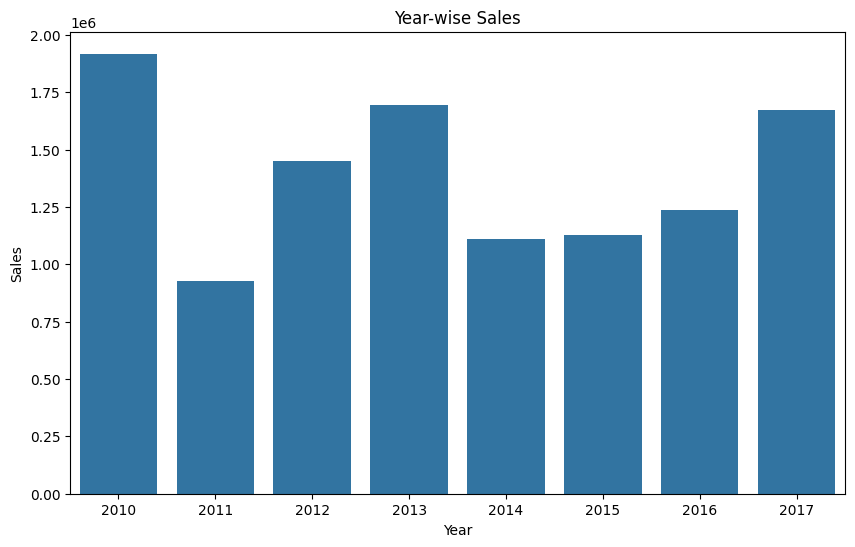

In [57]:
#year wise sales
year_sales = df.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=year_sales.index, y=year_sales.values)
plt.title('Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show

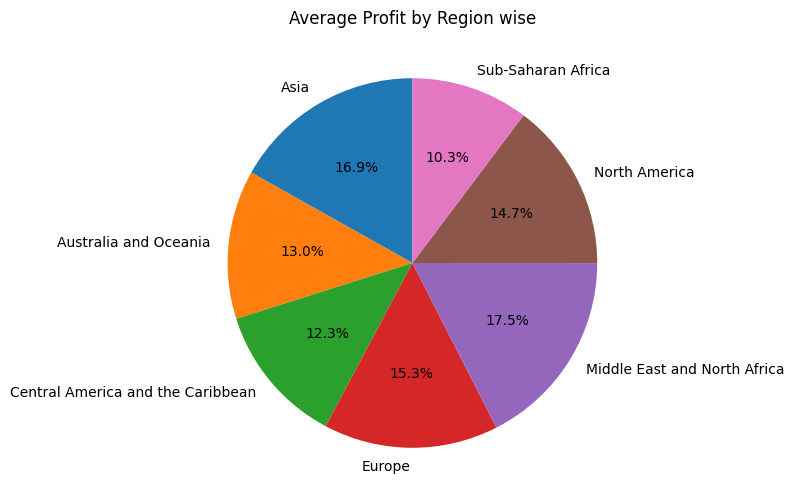

In [61]:
region_TotalRevenue = df.groupby('Region')['Total Profit'].mean()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(region_TotalRevenue, startangle=90, labels=region_TotalRevenue.index, autopct='%1.1f%%')
plt.title('Average Profit by Region wise')
plt.show()


Text(O.5, 1.0, 'Average Profit in Region wise)

In [62]:
#group total Revenue by Item type
total_revenue_Itemtype = df.groupby('Item Type')['Total Revenue'].sum()

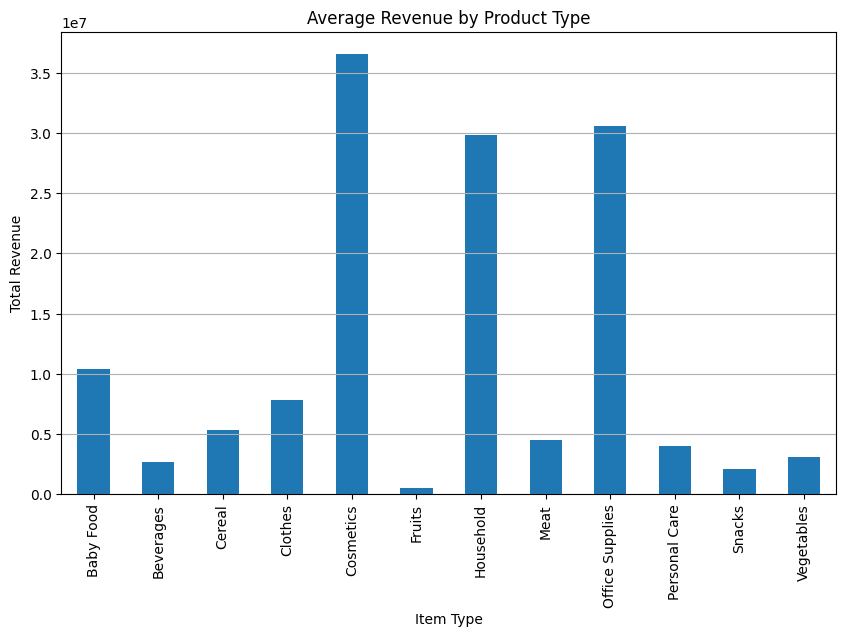

In [67]:
#Bar chart for Total Revenue by Item type
plt.figure(figsize=(10, 6))
total_revenue_Itemtype.plot(kind='bar')
plt.title('Average Revenue by Product Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.grid(axis='y')



In [72]:
#group Total Revenue by Sales Channel
TotalRevenue_SalesChannel = df.groupby('Sales Channel')['Total Revenue'].mean()

Text(0.5, 1.0, 'Total Revenue by Sales Channel')

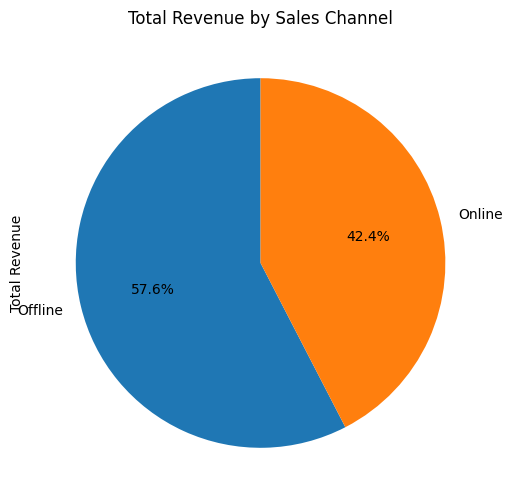

In [73]:
#bar chart for total Revenue by Item type
plt.figure(figsize=(10, 6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by Sales Channel')

(-1.099999989091756,
 1.0999997979771459,
 -1.099999582809504,
 1.0999999801337859)

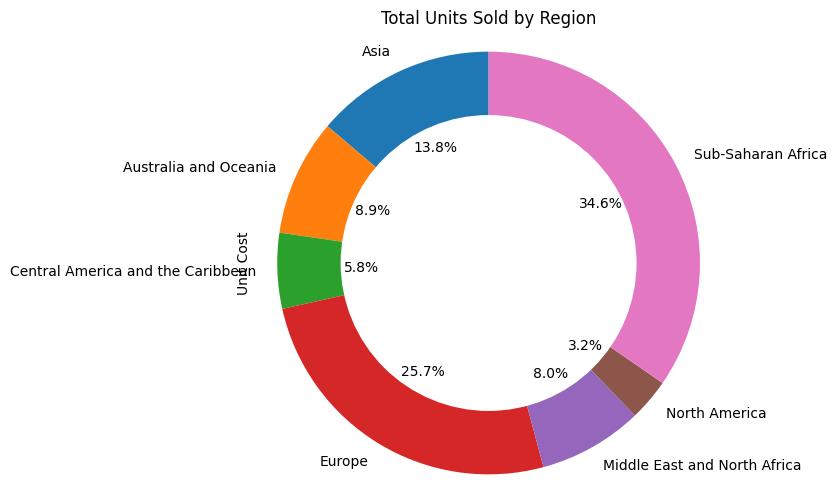

In [77]:
#Create a Pie chart for a donut chart
Region_unitsold = df.groupby('Region')['Unit Cost'].sum()
plt.figure(figsize=(6, 6))
Region_unitsold.plot(kind='pie', labels = Region_unitsold.index, autopct='%1.1f%%', startangle=90)

#Draw a circle at the centre of the pie chart
cntr_circle = plt.Circle((0,0),(0.70),fc='white')
fig = plt.gcf()
fig.gca().add_artist(cntr_circle)

#Equal aspect ration ensures that pie is drawn as a circle
plt.title('Total Units Sold by Region')
plt.axis('equal')

In [78]:
#Group Units Sold by year and month
year_month_unitsold = df.groupby(['Year', 'Month'])['Units Sold'].sum()

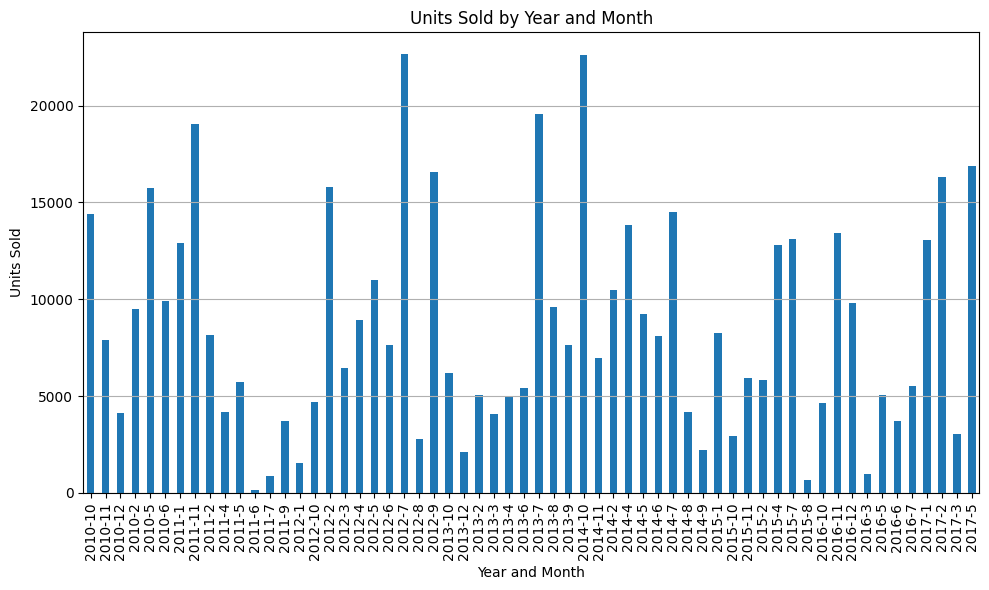

In [81]:
#Create a Bar chart for Units Solid by Year and Month

# Combine 'Year' and 'Month' into a single column
df['YearMonth'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

# Group by 'YearMonth' and calculate the total units sold
year_month_unitsold = df.groupby('YearMonth')['Units Sold'].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
year_month_unitsold.plot(kind='bar')
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.title('Units Sold by Year and Month')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.grid(axis='y')
plt.show()


In [82]:
#group total cost by sales Channel
TotalCost_SalesChannel = df.groupby('Sales Channel')['Total Cost'].sum()

Text(0.5, 1.0, 'Total Cost by Sales Channel')

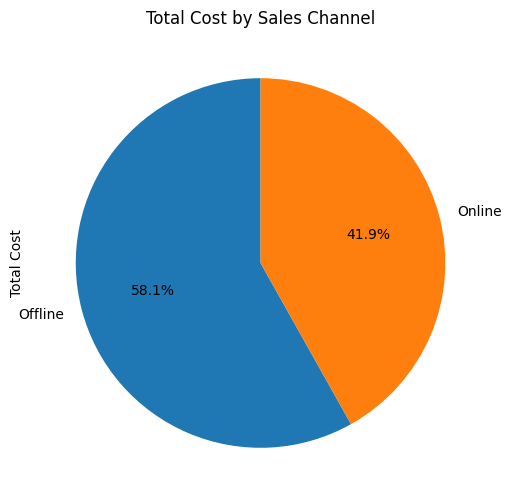

In [83]:
TotalCost_SalesChannel = df.groupby('Sales Channel')['Total Cost'].sum()

#bar chart for total cost by sales channel
plt.figure(figsize=(10, 6))
plt.tight_layout()
TotalCost_SalesChannel.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Cost by Sales Channel')